## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.721
Method:                 Least Squares   F-statistic:                              81.31
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   1.88e-102
Time:                        16:03:35   Log-Likelihood:                         -314.81
No. Observations:                 404   AIC:                                      655.6
Df Residuals:                     391   BIC:                                      707.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

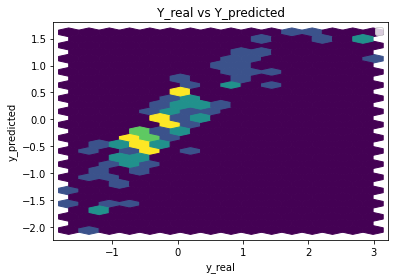

Performance Metrics
Mean Squared Error: 0.18755309360799075
Mean Absolute Error: 0.30687894564790313
Manhattan distance: 31.301652456086124
Euclidean distance: 4.373833049856276


Stats Model MAE 0.30687894564790313


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548
0:	learn: 0.9916067	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.9704264	total: 66.2ms	remaining: 33s
2:	learn: 0.9487219	total: 69ms	remaining: 22.9s
3:	learn: 0.9289235	total: 72.1ms	remaining: 17.9s
4:	learn: 0.9121986	total: 75ms	remaining: 14.9s
5:	learn: 0.8940264	total: 76.7ms	remaining: 12.7s
6:	learn: 0.8766983	total: 78.2ms	remaining: 11.1s
7:	learn: 0.8596064	total: 79.7ms	remaining: 9.89s
8:	learn: 0.8444015	total: 86.9ms	remaining: 9.56s
9:	learn: 0.8271750	total: 89.9ms	remaining: 8.9s
10:	learn: 0.8117636	total: 92.6ms	remaining: 8.32s
11:	learn: 0.7961320	total: 95.6ms	remaining: 7.87s
12:	learn: 0.7806326	total: 98.1ms	remaining: 7.45s
13:	learn: 0.7648171	total: 101ms	remaining: 7.12s
14:	learn: 0.7520648	total: 104ms	remaining: 6.81s
15:	learn: 0.7391863	total: 106ms	remaining: 6.55s
16:	learn: 0.7255369	total: 108ms	remaining: 6.27s
17:	learn: 0.7128852	total: 110ms	remaining: 6s
18:	learn: 0.7000623	total: 111ms	remaining: 5.75s


19:	learn: 0.6870296	total: 113ms	remaining: 5.53s
20:	learn: 0.6733767	total: 115ms	remaining: 5.36s
21:	learn: 0.6625366	total: 117ms	remaining: 5.18s
22:	learn: 0.6523237	total: 118ms	remaining: 5.02s
23:	learn: 0.6427858	total: 120ms	remaining: 4.88s
24:	learn: 0.6331633	total: 122ms	remaining: 4.77s
25:	learn: 0.6245710	total: 124ms	remaining: 4.65s
26:	learn: 0.6161062	total: 126ms	remaining: 4.53s
27:	learn: 0.6075427	total: 127ms	remaining: 4.42s
28:	learn: 0.5975194	total: 129ms	remaining: 4.33s


29:	learn: 0.5871315	total: 132ms	remaining: 4.26s
30:	learn: 0.5765469	total: 135ms	remaining: 4.2s
31:	learn: 0.5670759	total: 136ms	remaining: 4.12s
32:	learn: 0.5605237	total: 138ms	remaining: 4.04s
33:	learn: 0.5521897	total: 141ms	remaining: 4s
34:	learn: 0.5450992	total: 143ms	remaining: 3.94s
35:	learn: 0.5385334	total: 144ms	remaining: 3.86s
36:	learn: 0.5318784	total: 146ms	remaining: 3.79s
37:	learn: 0.5246446	total: 147ms	remaining: 3.72s
38:	learn: 0.5177415	total: 149ms	remaining: 3.66s
39:	learn: 0.5101890	total: 150ms	remaining: 3.6s
40:	learn: 0.5037183	total: 151ms	remaining: 3.54s
41:	learn: 0.4972700	total: 153ms	remaining: 3.48s
42:	learn: 0.4931468	total: 154ms	remaining: 3.42s
43:	learn: 0.4869128	total: 155ms	remaining: 3.37s
44:	learn: 0.4812794	total: 156ms	remaining: 3.32s
45:	learn: 0.4769479	total: 158ms	remaining: 3.27s
46:	learn: 0.4719749	total: 159ms	remaining: 3.22s
47:	learn: 0.4668807	total: 160ms	remaining: 3.18s
48:	learn: 0.4615518	total: 162ms	re

56:	learn: 0.4237303	total: 180ms	remaining: 2.98s
57:	learn: 0.4202037	total: 182ms	remaining: 2.95s
58:	learn: 0.4163587	total: 183ms	remaining: 2.92s
59:	learn: 0.4131524	total: 185ms	remaining: 2.9s
60:	learn: 0.4097469	total: 186ms	remaining: 2.87s
61:	learn: 0.4054614	total: 188ms	remaining: 2.84s
62:	learn: 0.4008577	total: 189ms	remaining: 2.81s
63:	learn: 0.3974383	total: 190ms	remaining: 2.78s
64:	learn: 0.3936782	total: 192ms	remaining: 2.76s
65:	learn: 0.3907249	total: 193ms	remaining: 2.73s
66:	learn: 0.3876201	total: 194ms	remaining: 2.71s
67:	learn: 0.3836908	total: 196ms	remaining: 2.68s
68:	learn: 0.3812743	total: 197ms	remaining: 2.66s
69:	learn: 0.3778946	total: 198ms	remaining: 2.64s
70:	learn: 0.3738550	total: 200ms	remaining: 2.61s
71:	learn: 0.3700366	total: 201ms	remaining: 2.59s
72:	learn: 0.3672768	total: 202ms	remaining: 2.57s
73:	learn: 0.3643223	total: 204ms	remaining: 2.55s
74:	learn: 0.3618698	total: 205ms	remaining: 2.53s
75:	learn: 0.3582638	total: 206m

137:	learn: 0.2609502	total: 294ms	remaining: 1.84s
138:	learn: 0.2597575	total: 296ms	remaining: 1.83s
139:	learn: 0.2586561	total: 297ms	remaining: 1.83s
140:	learn: 0.2577088	total: 299ms	remaining: 1.82s
141:	learn: 0.2569030	total: 300ms	remaining: 1.81s
142:	learn: 0.2558192	total: 301ms	remaining: 1.8s
143:	learn: 0.2550215	total: 303ms	remaining: 1.8s
144:	learn: 0.2540835	total: 304ms	remaining: 1.79s
145:	learn: 0.2528415	total: 305ms	remaining: 1.79s
146:	learn: 0.2522792	total: 309ms	remaining: 1.79s


147:	learn: 0.2512869	total: 315ms	remaining: 1.81s
148:	learn: 0.2505380	total: 319ms	remaining: 1.82s
149:	learn: 0.2500008	total: 321ms	remaining: 1.82s
150:	learn: 0.2490448	total: 324ms	remaining: 1.82s
151:	learn: 0.2482746	total: 326ms	remaining: 1.82s
152:	learn: 0.2474242	total: 327ms	remaining: 1.81s
153:	learn: 0.2466516	total: 329ms	remaining: 1.8s
154:	learn: 0.2458013	total: 330ms	remaining: 1.8s
155:	learn: 0.2451187	total: 332ms	remaining: 1.79s
156:	learn: 0.2443207	total: 333ms	remaining: 1.79s
157:	learn: 0.2434169	total: 335ms	remaining: 1.78s
158:	learn: 0.2426957	total: 336ms	remaining: 1.78s
159:	learn: 0.2418648	total: 337ms	remaining: 1.77s
160:	learn: 0.2413570	total: 339ms	remaining: 1.76s
161:	learn: 0.2402307	total: 340ms	remaining: 1.76s
162:	learn: 0.2396156	total: 341ms	remaining: 1.75s


163:	learn: 0.2391532	total: 343ms	remaining: 1.75s
164:	learn: 0.2385515	total: 345ms	remaining: 1.75s
165:	learn: 0.2378766	total: 347ms	remaining: 1.74s
166:	learn: 0.2370555	total: 348ms	remaining: 1.74s
167:	learn: 0.2360411	total: 350ms	remaining: 1.73s
168:	learn: 0.2355428	total: 351ms	remaining: 1.73s
169:	learn: 0.2349235	total: 352ms	remaining: 1.72s
170:	learn: 0.2344372	total: 354ms	remaining: 1.71s
171:	learn: 0.2337590	total: 355ms	remaining: 1.71s
172:	learn: 0.2329601	total: 356ms	remaining: 1.7s
173:	learn: 0.2319828	total: 358ms	remaining: 1.7s
174:	learn: 0.2313183	total: 359ms	remaining: 1.69s
175:	learn: 0.2305715	total: 360ms	remaining: 1.69s
176:	learn: 0.2298464	total: 362ms	remaining: 1.68s
177:	learn: 0.2290736	total: 363ms	remaining: 1.68s
178:	learn: 0.2284750	total: 364ms	remaining: 1.67s
179:	learn: 0.2276207	total: 366ms	remaining: 1.67s
180:	learn: 0.2269173	total: 367ms	remaining: 1.66s
181:	learn: 0.2258336	total: 368ms	remaining: 1.66s
182:	learn: 0.

248:	learn: 0.1877741	total: 456ms	remaining: 1.38s
249:	learn: 0.1872371	total: 458ms	remaining: 1.37s
250:	learn: 0.1867561	total: 460ms	remaining: 1.37s
251:	learn: 0.1861176	total: 461ms	remaining: 1.37s
252:	learn: 0.1855377	total: 462ms	remaining: 1.36s
253:	learn: 0.1850761	total: 464ms	remaining: 1.36s
254:	learn: 0.1846588	total: 465ms	remaining: 1.36s
255:	learn: 0.1842077	total: 466ms	remaining: 1.35s
256:	learn: 0.1837668	total: 468ms	remaining: 1.35s
257:	learn: 0.1833756	total: 469ms	remaining: 1.35s
258:	learn: 0.1829461	total: 470ms	remaining: 1.34s
259:	learn: 0.1825370	total: 472ms	remaining: 1.34s
260:	learn: 0.1817491	total: 473ms	remaining: 1.34s
261:	learn: 0.1812512	total: 474ms	remaining: 1.34s
262:	learn: 0.1807642	total: 476ms	remaining: 1.33s
263:	learn: 0.1801184	total: 477ms	remaining: 1.33s
264:	learn: 0.1797884	total: 478ms	remaining: 1.33s
265:	learn: 0.1794137	total: 480ms	remaining: 1.32s
266:	learn: 0.1791101	total: 483ms	remaining: 1.32s
267:	learn: 

271:	learn: 0.1776597	total: 499ms	remaining: 1.33s
272:	learn: 0.1771818	total: 504ms	remaining: 1.34s
273:	learn: 0.1767263	total: 505ms	remaining: 1.34s
274:	learn: 0.1762425	total: 507ms	remaining: 1.33s
275:	learn: 0.1758050	total: 508ms	remaining: 1.33s
276:	learn: 0.1749936	total: 509ms	remaining: 1.33s
277:	learn: 0.1745151	total: 511ms	remaining: 1.33s
278:	learn: 0.1741666	total: 512ms	remaining: 1.32s
279:	learn: 0.1734702	total: 514ms	remaining: 1.32s
280:	learn: 0.1729956	total: 517ms	remaining: 1.32s
281:	learn: 0.1726956	total: 520ms	remaining: 1.32s
282:	learn: 0.1722641	total: 522ms	remaining: 1.32s


283:	learn: 0.1718254	total: 525ms	remaining: 1.32s
284:	learn: 0.1712226	total: 527ms	remaining: 1.32s
285:	learn: 0.1707228	total: 529ms	remaining: 1.32s
286:	learn: 0.1703350	total: 531ms	remaining: 1.32s
287:	learn: 0.1700925	total: 532ms	remaining: 1.32s
288:	learn: 0.1694464	total: 536ms	remaining: 1.32s
289:	learn: 0.1689381	total: 546ms	remaining: 1.34s
290:	learn: 0.1683462	total: 549ms	remaining: 1.34s
291:	learn: 0.1680404	total: 552ms	remaining: 1.34s
292:	learn: 0.1677963	total: 555ms	remaining: 1.34s
293:	learn: 0.1673875	total: 557ms	remaining: 1.34s
294:	learn: 0.1669949	total: 560ms	remaining: 1.34s
295:	learn: 0.1665687	total: 562ms	remaining: 1.34s
296:	learn: 0.1662063	total: 564ms	remaining: 1.33s
297:	learn: 0.1659164	total: 566ms	remaining: 1.33s
298:	learn: 0.1653211	total: 569ms	remaining: 1.33s
299:	learn: 0.1651272	total: 572ms	remaining: 1.33s
300:	learn: 0.1649224	total: 574ms	remaining: 1.33s
301:	learn: 0.1645419	total: 578ms	remaining: 1.33s
302:	learn: 

316:	learn: 0.1591844	total: 613ms	remaining: 1.32s
317:	learn: 0.1587627	total: 619ms	remaining: 1.33s
318:	learn: 0.1582277	total: 621ms	remaining: 1.32s
319:	learn: 0.1579107	total: 622ms	remaining: 1.32s
320:	learn: 0.1574100	total: 624ms	remaining: 1.32s
321:	learn: 0.1570211	total: 625ms	remaining: 1.32s
322:	learn: 0.1567180	total: 626ms	remaining: 1.31s
323:	learn: 0.1563725	total: 628ms	remaining: 1.31s
324:	learn: 0.1561614	total: 629ms	remaining: 1.31s
325:	learn: 0.1559465	total: 630ms	remaining: 1.3s
326:	learn: 0.1558150	total: 632ms	remaining: 1.3s
327:	learn: 0.1554412	total: 633ms	remaining: 1.3s
328:	learn: 0.1551679	total: 634ms	remaining: 1.29s
329:	learn: 0.1547812	total: 636ms	remaining: 1.29s
330:	learn: 0.1544514	total: 637ms	remaining: 1.29s
331:	learn: 0.1540433	total: 639ms	remaining: 1.28s
332:	learn: 0.1537535	total: 640ms	remaining: 1.28s
333:	learn: 0.1534098	total: 641ms	remaining: 1.28s
334:	learn: 0.1531086	total: 642ms	remaining: 1.27s
335:	learn: 0.1

345:	learn: 0.1492724	total: 657ms	remaining: 1.24s
346:	learn: 0.1489866	total: 659ms	remaining: 1.24s
347:	learn: 0.1485565	total: 660ms	remaining: 1.24s
348:	learn: 0.1481064	total: 661ms	remaining: 1.23s
349:	learn: 0.1477248	total: 663ms	remaining: 1.23s
350:	learn: 0.1474207	total: 664ms	remaining: 1.23s
351:	learn: 0.1469873	total: 665ms	remaining: 1.22s
352:	learn: 0.1466549	total: 667ms	remaining: 1.22s
353:	learn: 0.1461920	total: 668ms	remaining: 1.22s
354:	learn: 0.1458077	total: 669ms	remaining: 1.22s
355:	learn: 0.1455800	total: 670ms	remaining: 1.21s
356:	learn: 0.1453383	total: 672ms	remaining: 1.21s
357:	learn: 0.1449643	total: 673ms	remaining: 1.21s
358:	learn: 0.1445275	total: 674ms	remaining: 1.2s
359:	learn: 0.1441800	total: 676ms	remaining: 1.2s
360:	learn: 0.1439935	total: 677ms	remaining: 1.2s
361:	learn: 0.1436262	total: 678ms	remaining: 1.2s


362:	learn: 0.1433529	total: 679ms	remaining: 1.19s
363:	learn: 0.1431179	total: 681ms	remaining: 1.19s
364:	learn: 0.1427458	total: 683ms	remaining: 1.19s
365:	learn: 0.1425156	total: 684ms	remaining: 1.18s
366:	learn: 0.1423295	total: 685ms	remaining: 1.18s
367:	learn: 0.1421781	total: 688ms	remaining: 1.18s
368:	learn: 0.1417939	total: 689ms	remaining: 1.18s
369:	learn: 0.1413625	total: 691ms	remaining: 1.18s
370:	learn: 0.1409536	total: 692ms	remaining: 1.17s
371:	learn: 0.1406626	total: 694ms	remaining: 1.17s
372:	learn: 0.1404729	total: 695ms	remaining: 1.17s
373:	learn: 0.1399982	total: 696ms	remaining: 1.17s
374:	learn: 0.1397395	total: 698ms	remaining: 1.16s
375:	learn: 0.1394124	total: 700ms	remaining: 1.16s
376:	learn: 0.1391904	total: 701ms	remaining: 1.16s
377:	learn: 0.1390803	total: 703ms	remaining: 1.16s
378:	learn: 0.1387461	total: 704ms	remaining: 1.15s
379:	learn: 0.1385706	total: 706ms	remaining: 1.15s
380:	learn: 0.1381542	total: 707ms	remaining: 1.15s
381:	learn: 

441:	learn: 0.1214952	total: 792ms	remaining: 1s
442:	learn: 0.1211839	total: 794ms	remaining: 999ms
443:	learn: 0.1209629	total: 796ms	remaining: 997ms
444:	learn: 0.1206772	total: 797ms	remaining: 995ms
445:	learn: 0.1203301	total: 799ms	remaining: 992ms
446:	learn: 0.1201326	total: 800ms	remaining: 990ms
447:	learn: 0.1199386	total: 802ms	remaining: 988ms
448:	learn: 0.1197216	total: 803ms	remaining: 985ms
449:	learn: 0.1193676	total: 804ms	remaining: 983ms
450:	learn: 0.1191442	total: 806ms	remaining: 981ms
451:	learn: 0.1190262	total: 807ms	remaining: 978ms
452:	learn: 0.1188685	total: 808ms	remaining: 976ms
453:	learn: 0.1188152	total: 810ms	remaining: 974ms
454:	learn: 0.1184403	total: 811ms	remaining: 971ms
455:	learn: 0.1181924	total: 813ms	remaining: 969ms
456:	learn: 0.1178462	total: 814ms	remaining: 967ms
457:	learn: 0.1176516	total: 815ms	remaining: 965ms
458:	learn: 0.1175400	total: 817ms	remaining: 963ms
459:	learn: 0.1172875	total: 818ms	remaining: 960ms
460:	learn: 0.1

473:	learn: 0.1144113	total: 838ms	remaining: 930ms
474:	learn: 0.1142978	total: 840ms	remaining: 929ms
475:	learn: 0.1139946	total: 841ms	remaining: 926ms
476:	learn: 0.1136637	total: 843ms	remaining: 924ms
477:	learn: 0.1134486	total: 844ms	remaining: 922ms
478:	learn: 0.1132718	total: 846ms	remaining: 920ms
479:	learn: 0.1130886	total: 848ms	remaining: 919ms
480:	learn: 0.1128571	total: 850ms	remaining: 917ms
481:	learn: 0.1125867	total: 851ms	remaining: 915ms
482:	learn: 0.1124822	total: 853ms	remaining: 913ms
483:	learn: 0.1123895	total: 854ms	remaining: 910ms
484:	learn: 0.1121671	total: 855ms	remaining: 908ms
485:	learn: 0.1120058	total: 857ms	remaining: 906ms
486:	learn: 0.1119225	total: 858ms	remaining: 904ms


487:	learn: 0.1117300	total: 859ms	remaining: 902ms
488:	learn: 0.1115344	total: 861ms	remaining: 900ms
489:	learn: 0.1112786	total: 863ms	remaining: 898ms
490:	learn: 0.1109655	total: 866ms	remaining: 898ms
491:	learn: 0.1107258	total: 868ms	remaining: 896ms
492:	learn: 0.1104646	total: 869ms	remaining: 894ms
493:	learn: 0.1102059	total: 871ms	remaining: 892ms
494:	learn: 0.1100364	total: 872ms	remaining: 890ms
495:	learn: 0.1099040	total: 873ms	remaining: 887ms
496:	learn: 0.1096969	total: 875ms	remaining: 885ms
497:	learn: 0.1094516	total: 876ms	remaining: 883ms
498:	learn: 0.1092598	total: 878ms	remaining: 881ms
499:	learn: 0.1091009	total: 879ms	remaining: 879ms
500:	learn: 0.1089423	total: 881ms	remaining: 877ms
501:	learn: 0.1087218	total: 883ms	remaining: 875ms
502:	learn: 0.1086506	total: 884ms	remaining: 873ms
503:	learn: 0.1084314	total: 886ms	remaining: 872ms
504:	learn: 0.1082408	total: 887ms	remaining: 870ms
505:	learn: 0.1080100	total: 889ms	remaining: 868ms
506:	learn: 

557:	learn: 0.0989596	total: 973ms	remaining: 771ms
558:	learn: 0.0988177	total: 977ms	remaining: 771ms
559:	learn: 0.0987187	total: 979ms	remaining: 769ms
560:	learn: 0.0984763	total: 982ms	remaining: 768ms
561:	learn: 0.0982895	total: 985ms	remaining: 768ms
562:	learn: 0.0980386	total: 990ms	remaining: 768ms
563:	learn: 0.0977658	total: 994ms	remaining: 769ms
564:	learn: 0.0976148	total: 996ms	remaining: 766ms
565:	learn: 0.0974903	total: 997ms	remaining: 764ms
566:	learn: 0.0973150	total: 998ms	remaining: 762ms
567:	learn: 0.0972416	total: 1000ms	remaining: 760ms
568:	learn: 0.0970063	total: 1s	remaining: 758ms
569:	learn: 0.0967453	total: 1s	remaining: 756ms
570:	learn: 0.0965152	total: 1s	remaining: 754ms
571:	learn: 0.0962447	total: 1s	remaining: 752ms
572:	learn: 0.0960021	total: 1.01s	remaining: 750ms
573:	learn: 0.0957934	total: 1.01s	remaining: 748ms
574:	learn: 0.0956216	total: 1.01s	remaining: 746ms
575:	learn: 0.0954173	total: 1.01s	remaining: 744ms
576:	learn: 0.0953151	t

579:	learn: 0.0947722	total: 1.02s	remaining: 741ms
580:	learn: 0.0945078	total: 1.02s	remaining: 740ms
581:	learn: 0.0943739	total: 1.03s	remaining: 738ms
582:	learn: 0.0942587	total: 1.03s	remaining: 737ms
583:	learn: 0.0941747	total: 1.03s	remaining: 736ms
584:	learn: 0.0940005	total: 1.03s	remaining: 735ms
585:	learn: 0.0938176	total: 1.04s	remaining: 733ms
586:	learn: 0.0935631	total: 1.04s	remaining: 731ms


587:	learn: 0.0933473	total: 1.04s	remaining: 729ms
588:	learn: 0.0931469	total: 1.04s	remaining: 727ms
589:	learn: 0.0929783	total: 1.04s	remaining: 725ms
590:	learn: 0.0928201	total: 1.04s	remaining: 723ms
591:	learn: 0.0926636	total: 1.05s	remaining: 722ms
592:	learn: 0.0924306	total: 1.05s	remaining: 722ms
593:	learn: 0.0923947	total: 1.05s	remaining: 721ms
594:	learn: 0.0921826	total: 1.06s	remaining: 719ms
595:	learn: 0.0919649	total: 1.06s	remaining: 717ms
596:	learn: 0.0917031	total: 1.06s	remaining: 715ms
597:	learn: 0.0916093	total: 1.06s	remaining: 713ms
598:	learn: 0.0914162	total: 1.06s	remaining: 712ms
599:	learn: 0.0912417	total: 1.06s	remaining: 710ms
600:	learn: 0.0911648	total: 1.07s	remaining: 709ms
601:	learn: 0.0909484	total: 1.07s	remaining: 707ms
602:	learn: 0.0907687	total: 1.07s	remaining: 705ms
603:	learn: 0.0906118	total: 1.07s	remaining: 703ms
604:	learn: 0.0904889	total: 1.07s	remaining: 701ms
605:	learn: 0.0902955	total: 1.07s	remaining: 699ms
606:	learn: 

647:	learn: 0.0843983	total: 1.15s	remaining: 623ms
648:	learn: 0.0842145	total: 1.15s	remaining: 621ms
649:	learn: 0.0840768	total: 1.15s	remaining: 619ms
650:	learn: 0.0839603	total: 1.15s	remaining: 618ms
651:	learn: 0.0838617	total: 1.16s	remaining: 617ms
652:	learn: 0.0837402	total: 1.16s	remaining: 616ms
653:	learn: 0.0836030	total: 1.16s	remaining: 616ms
654:	learn: 0.0834413	total: 1.17s	remaining: 615ms
655:	learn: 0.0832302	total: 1.17s	remaining: 614ms
656:	learn: 0.0830475	total: 1.17s	remaining: 612ms
657:	learn: 0.0828750	total: 1.18s	remaining: 611ms
658:	learn: 0.0827484	total: 1.18s	remaining: 609ms
659:	learn: 0.0825670	total: 1.18s	remaining: 608ms
660:	learn: 0.0824066	total: 1.19s	remaining: 609ms
661:	learn: 0.0822098	total: 1.19s	remaining: 608ms


662:	learn: 0.0820708	total: 1.2s	remaining: 612ms


663:	learn: 0.0818984	total: 1.21s	remaining: 611ms
664:	learn: 0.0817835	total: 1.21s	remaining: 610ms
665:	learn: 0.0815768	total: 1.21s	remaining: 608ms
666:	learn: 0.0815219	total: 1.21s	remaining: 606ms
667:	learn: 0.0814906	total: 1.22s	remaining: 604ms
668:	learn: 0.0813595	total: 1.22s	remaining: 602ms
669:	learn: 0.0812321	total: 1.22s	remaining: 600ms
670:	learn: 0.0811007	total: 1.22s	remaining: 599ms
671:	learn: 0.0810193	total: 1.22s	remaining: 597ms
672:	learn: 0.0808615	total: 1.22s	remaining: 595ms
673:	learn: 0.0807556	total: 1.22s	remaining: 592ms
674:	learn: 0.0806863	total: 1.23s	remaining: 591ms
675:	learn: 0.0805889	total: 1.23s	remaining: 589ms
676:	learn: 0.0805355	total: 1.23s	remaining: 587ms
677:	learn: 0.0804133	total: 1.23s	remaining: 585ms
678:	learn: 0.0802470	total: 1.23s	remaining: 583ms
679:	learn: 0.0801069	total: 1.23s	remaining: 581ms
680:	learn: 0.0800703	total: 1.24s	remaining: 579ms
681:	learn: 0.0799598	total: 1.24s	remaining: 577ms
682:	learn: 

732:	learn: 0.0743773	total: 1.32s	remaining: 480ms
733:	learn: 0.0743154	total: 1.32s	remaining: 478ms
734:	learn: 0.0742727	total: 1.32s	remaining: 476ms
735:	learn: 0.0742464	total: 1.32s	remaining: 474ms
736:	learn: 0.0742099	total: 1.32s	remaining: 472ms
737:	learn: 0.0741610	total: 1.32s	remaining: 470ms
738:	learn: 0.0740224	total: 1.33s	remaining: 468ms
739:	learn: 0.0737997	total: 1.33s	remaining: 467ms
740:	learn: 0.0737109	total: 1.33s	remaining: 465ms
741:	learn: 0.0736757	total: 1.33s	remaining: 463ms
742:	learn: 0.0735297	total: 1.33s	remaining: 461ms
743:	learn: 0.0734506	total: 1.33s	remaining: 459ms
744:	learn: 0.0732513	total: 1.33s	remaining: 457ms
745:	learn: 0.0730811	total: 1.34s	remaining: 455ms
746:	learn: 0.0729423	total: 1.34s	remaining: 453ms
747:	learn: 0.0727726	total: 1.34s	remaining: 451ms
748:	learn: 0.0727019	total: 1.34s	remaining: 449ms
749:	learn: 0.0725752	total: 1.34s	remaining: 447ms
750:	learn: 0.0725133	total: 1.34s	remaining: 446ms
751:	learn: 

764:	learn: 0.0710406	total: 1.37s	remaining: 422ms
765:	learn: 0.0708895	total: 1.38s	remaining: 420ms
766:	learn: 0.0708502	total: 1.38s	remaining: 418ms
767:	learn: 0.0706998	total: 1.38s	remaining: 416ms
768:	learn: 0.0706659	total: 1.38s	remaining: 414ms
769:	learn: 0.0706424	total: 1.38s	remaining: 412ms
770:	learn: 0.0705256	total: 1.38s	remaining: 410ms


771:	learn: 0.0703676	total: 1.38s	remaining: 409ms
772:	learn: 0.0701797	total: 1.39s	remaining: 407ms
773:	learn: 0.0700490	total: 1.39s	remaining: 405ms
774:	learn: 0.0700278	total: 1.39s	remaining: 403ms
775:	learn: 0.0700056	total: 1.39s	remaining: 401ms
776:	learn: 0.0699300	total: 1.39s	remaining: 399ms
777:	learn: 0.0697980	total: 1.39s	remaining: 397ms
778:	learn: 0.0697459	total: 1.4s	remaining: 396ms
779:	learn: 0.0696719	total: 1.4s	remaining: 395ms
780:	learn: 0.0694999	total: 1.4s	remaining: 393ms
781:	learn: 0.0694025	total: 1.4s	remaining: 391ms
782:	learn: 0.0692673	total: 1.4s	remaining: 389ms
783:	learn: 0.0692084	total: 1.41s	remaining: 387ms
784:	learn: 0.0691004	total: 1.41s	remaining: 385ms
785:	learn: 0.0690778	total: 1.41s	remaining: 384ms
786:	learn: 0.0689584	total: 1.41s	remaining: 383ms
787:	learn: 0.0688435	total: 1.41s	remaining: 381ms
788:	learn: 0.0687600	total: 1.42s	remaining: 379ms
789:	learn: 0.0685867	total: 1.42s	remaining: 377ms
790:	learn: 0.068

834:	learn: 0.0642184	total: 1.48s	remaining: 293ms
835:	learn: 0.0641133	total: 1.49s	remaining: 292ms
836:	learn: 0.0639691	total: 1.49s	remaining: 291ms
837:	learn: 0.0638581	total: 1.49s	remaining: 289ms
838:	learn: 0.0637985	total: 1.5s	remaining: 287ms
839:	learn: 0.0637103	total: 1.5s	remaining: 285ms
840:	learn: 0.0636460	total: 1.5s	remaining: 283ms
841:	learn: 0.0635117	total: 1.5s	remaining: 281ms
842:	learn: 0.0634574	total: 1.5s	remaining: 280ms
843:	learn: 0.0633317	total: 1.5s	remaining: 278ms
844:	learn: 0.0632896	total: 1.5s	remaining: 276ms
845:	learn: 0.0632027	total: 1.5s	remaining: 274ms
846:	learn: 0.0631456	total: 1.51s	remaining: 272ms
847:	learn: 0.0630249	total: 1.51s	remaining: 270ms
848:	learn: 0.0628624	total: 1.51s	remaining: 269ms
849:	learn: 0.0627367	total: 1.51s	remaining: 267ms
850:	learn: 0.0626150	total: 1.51s	remaining: 265ms
851:	learn: 0.0625828	total: 1.51s	remaining: 263ms
852:	learn: 0.0625060	total: 1.51s	remaining: 261ms
853:	learn: 0.062392

867:	learn: 0.0613822	total: 1.54s	remaining: 234ms
868:	learn: 0.0612727	total: 1.54s	remaining: 232ms
869:	learn: 0.0611944	total: 1.54s	remaining: 231ms
870:	learn: 0.0610697	total: 1.54s	remaining: 229ms
871:	learn: 0.0609609	total: 1.54s	remaining: 227ms
872:	learn: 0.0608996	total: 1.55s	remaining: 225ms


873:	learn: 0.0607683	total: 1.55s	remaining: 223ms
874:	learn: 0.0606419	total: 1.55s	remaining: 222ms
875:	learn: 0.0605506	total: 1.55s	remaining: 220ms
876:	learn: 0.0604311	total: 1.55s	remaining: 218ms
877:	learn: 0.0603621	total: 1.56s	remaining: 216ms
878:	learn: 0.0602585	total: 1.56s	remaining: 214ms
879:	learn: 0.0600542	total: 1.56s	remaining: 213ms
880:	learn: 0.0599842	total: 1.56s	remaining: 211ms
881:	learn: 0.0598449	total: 1.56s	remaining: 209ms
882:	learn: 0.0598302	total: 1.56s	remaining: 207ms
883:	learn: 0.0597415	total: 1.56s	remaining: 205ms
884:	learn: 0.0596214	total: 1.57s	remaining: 204ms
885:	learn: 0.0595465	total: 1.57s	remaining: 202ms
886:	learn: 0.0595011	total: 1.57s	remaining: 200ms
887:	learn: 0.0594629	total: 1.57s	remaining: 198ms
888:	learn: 0.0594052	total: 1.57s	remaining: 196ms
889:	learn: 0.0592686	total: 1.57s	remaining: 195ms
890:	learn: 0.0591457	total: 1.58s	remaining: 193ms
891:	learn: 0.0590134	total: 1.58s	remaining: 191ms
892:	learn: 

939:	learn: 0.0549300	total: 1.66s	remaining: 106ms
940:	learn: 0.0548539	total: 1.66s	remaining: 104ms
941:	learn: 0.0548007	total: 1.66s	remaining: 102ms
942:	learn: 0.0547748	total: 1.66s	remaining: 101ms
943:	learn: 0.0547603	total: 1.66s	remaining: 98.8ms
944:	learn: 0.0547005	total: 1.67s	remaining: 97ms
945:	learn: 0.0545757	total: 1.67s	remaining: 95.3ms
946:	learn: 0.0545159	total: 1.67s	remaining: 93.6ms
947:	learn: 0.0544398	total: 1.67s	remaining: 91.8ms
948:	learn: 0.0543866	total: 1.68s	remaining: 90.1ms
949:	learn: 0.0542770	total: 1.68s	remaining: 88.3ms
950:	learn: 0.0542087	total: 1.68s	remaining: 86.5ms
951:	learn: 0.0541517	total: 1.68s	remaining: 84.7ms
952:	learn: 0.0540951	total: 1.68s	remaining: 82.9ms
953:	learn: 0.0540289	total: 1.68s	remaining: 81.2ms
954:	learn: 0.0539734	total: 1.68s	remaining: 79.4ms
955:	learn: 0.0538806	total: 1.69s	remaining: 77.6ms
956:	learn: 0.0538125	total: 1.69s	remaining: 75.8ms
957:	learn: 0.0536485	total: 1.69s	remaining: 74.1ms

975:	learn: 0.0523393	total: 1.72s	remaining: 42.2ms
976:	learn: 0.0522164	total: 1.72s	remaining: 40.5ms
977:	learn: 0.0521331	total: 1.72s	remaining: 38.7ms
978:	learn: 0.0519941	total: 1.72s	remaining: 36.9ms
979:	learn: 0.0519809	total: 1.72s	remaining: 35.2ms
980:	learn: 0.0519043	total: 1.72s	remaining: 33.4ms


981:	learn: 0.0518295	total: 1.73s	remaining: 31.7ms
982:	learn: 0.0517635	total: 1.73s	remaining: 29.9ms
983:	learn: 0.0517096	total: 1.73s	remaining: 28.1ms
984:	learn: 0.0516583	total: 1.73s	remaining: 26.4ms
985:	learn: 0.0515782	total: 1.73s	remaining: 24.6ms
986:	learn: 0.0514915	total: 1.73s	remaining: 22.8ms
987:	learn: 0.0514755	total: 1.74s	remaining: 21.1ms
988:	learn: 0.0513997	total: 1.74s	remaining: 19.3ms
989:	learn: 0.0513171	total: 1.74s	remaining: 17.6ms
990:	learn: 0.0512834	total: 1.74s	remaining: 15.8ms
991:	learn: 0.0512235	total: 1.74s	remaining: 14ms
992:	learn: 0.0511265	total: 1.74s	remaining: 12.3ms
993:	learn: 0.0510125	total: 1.74s	remaining: 10.5ms
994:	learn: 0.0509872	total: 1.75s	remaining: 8.77ms
995:	learn: 0.0509614	total: 1.75s	remaining: 7.02ms
996:	learn: 0.0508343	total: 1.75s	remaining: 5.26ms
997:	learn: 0.0508217	total: 1.75s	remaining: 3.51ms
998:	learn: 0.0507238	total: 1.75s	remaining: 1.75ms
999:	learn: 0.0506694	total: 1.75s	remaining: 0u

Catboost MAE 0.19807219077851979


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.9046  | train_mse: 0.92814 | train_mae: 0.69054 |  0:00:02s


epoch 1  | loss: 1.13312 | train_mse: 0.87914 | train_mae: 0.64478 |  0:00:02s


epoch 2  | loss: 0.72808 | train_mse: 0.65333 | train_mae: 0.55374 |  0:00:03s


epoch 3  | loss: 0.54715 | train_mse: 0.45786 | train_mae: 0.48895 |  0:00:03s


epoch 4  | loss: 0.44495 | train_mse: 0.46099 | train_mae: 0.48528 |  0:00:04s


epoch 5  | loss: 0.44788 | train_mse: 0.40869 | train_mae: 0.45354 |  0:00:04s


epoch 6  | loss: 0.45809 | train_mse: 0.36497 | train_mae: 0.41501 |  0:00:04s


epoch 7  | loss: 0.37106 | train_mse: 0.40438 | train_mae: 0.43592 |  0:00:05s


epoch 8  | loss: 0.38069 | train_mse: 0.34893 | train_mae: 0.38246 |  0:00:05s


epoch 9  | loss: 0.42444 | train_mse: 0.36959 | train_mae: 0.38717 |  0:00:06s


epoch 10 | loss: 0.45431 | train_mse: 0.2964  | train_mae: 0.36024 |  0:00:06s


epoch 11 | loss: 0.3534  | train_mse: 0.30509 | train_mae: 0.36827 |  0:00:06s


epoch 12 | loss: 0.38556 | train_mse: 0.31065 | train_mae: 0.38228 |  0:00:07s


epoch 13 | loss: 0.32148 | train_mse: 0.28752 | train_mae: 0.35402 |  0:00:07s


epoch 14 | loss: 0.31684 | train_mse: 0.2638  | train_mae: 0.33099 |  0:00:08s


epoch 15 | loss: 0.29573 | train_mse: 0.26824 | train_mae: 0.3418  |  0:00:08s


epoch 16 | loss: 0.32083 | train_mse: 0.24518 | train_mae: 0.31337 |  0:00:09s


epoch 17 | loss: 0.31149 | train_mse: 0.25491 | train_mae: 0.32203 |  0:00:09s


epoch 18 | loss: 0.30683 | train_mse: 0.24741 | train_mae: 0.32165 |  0:00:09s


epoch 19 | loss: 0.22846 | train_mse: 0.21322 | train_mae: 0.30203 |  0:00:10s


epoch 20 | loss: 0.29635 | train_mse: 0.20377 | train_mae: 0.29958 |  0:00:10s


epoch 21 | loss: 0.26153 | train_mse: 0.18707 | train_mae: 0.27955 |  0:00:10s


epoch 22 | loss: 0.26876 | train_mse: 0.19418 | train_mae: 0.30333 |  0:00:11s


epoch 23 | loss: 0.27852 | train_mse: 0.17666 | train_mae: 0.29081 |  0:00:11s


epoch 24 | loss: 0.2595  | train_mse: 0.16849 | train_mae: 0.28262 |  0:00:12s


epoch 25 | loss: 0.22972 | train_mse: 0.16651 | train_mae: 0.27908 |  0:00:12s


epoch 26 | loss: 0.25002 | train_mse: 0.17234 | train_mae: 0.2876  |  0:00:12s


epoch 27 | loss: 0.25453 | train_mse: 0.15475 | train_mae: 0.26859 |  0:00:13s


epoch 28 | loss: 0.24373 | train_mse: 0.16365 | train_mae: 0.27464 |  0:00:13s


epoch 29 | loss: 0.22348 | train_mse: 0.14823 | train_mae: 0.26944 |  0:00:14s


epoch 30 | loss: 0.26134 | train_mse: 0.16108 | train_mae: 0.28837 |  0:00:14s


epoch 31 | loss: 0.31488 | train_mse: 0.18267 | train_mae: 0.31567 |  0:00:14s


epoch 32 | loss: 0.26125 | train_mse: 0.17176 | train_mae: 0.29134 |  0:00:15s


epoch 33 | loss: 0.21792 | train_mse: 0.16256 | train_mae: 0.28048 |  0:00:15s


epoch 34 | loss: 0.21432 | train_mse: 0.14373 | train_mae: 0.26446 |  0:00:16s


epoch 35 | loss: 0.23459 | train_mse: 0.15272 | train_mae: 0.26832 |  0:00:16s


epoch 36 | loss: 0.2197  | train_mse: 0.14196 | train_mae: 0.25513 |  0:00:16s


epoch 37 | loss: 0.25288 | train_mse: 0.14863 | train_mae: 0.2637  |  0:00:17s


epoch 38 | loss: 0.18704 | train_mse: 0.13218 | train_mae: 0.25725 |  0:00:17s


epoch 39 | loss: 0.19238 | train_mse: 0.12944 | train_mae: 0.24798 |  0:00:18s


epoch 40 | loss: 0.20184 | train_mse: 0.13932 | train_mae: 0.25396 |  0:00:18s


epoch 41 | loss: 0.26951 | train_mse: 0.16842 | train_mae: 0.28334 |  0:00:19s


epoch 42 | loss: 0.22271 | train_mse: 0.13104 | train_mae: 0.25505 |  0:00:19s


epoch 43 | loss: 0.20977 | train_mse: 0.12346 | train_mae: 0.23919 |  0:00:19s


epoch 44 | loss: 0.19407 | train_mse: 0.13137 | train_mae: 0.25117 |  0:00:20s


epoch 45 | loss: 0.17317 | train_mse: 0.12535 | train_mae: 0.24408 |  0:00:20s


epoch 46 | loss: 0.20832 | train_mse: 0.1142  | train_mae: 0.23274 |  0:00:20s


epoch 47 | loss: 0.21115 | train_mse: 0.11605 | train_mae: 0.23892 |  0:00:21s


epoch 48 | loss: 0.18858 | train_mse: 0.11808 | train_mae: 0.24557 |  0:00:21s


epoch 49 | loss: 0.15821 | train_mse: 0.11143 | train_mae: 0.22643 |  0:00:22s


epoch 50 | loss: 0.2305  | train_mse: 0.12264 | train_mae: 0.23373 |  0:00:22s


epoch 51 | loss: 0.20095 | train_mse: 0.11677 | train_mae: 0.23377 |  0:00:22s


epoch 52 | loss: 0.16082 | train_mse: 0.11631 | train_mae: 0.24209 |  0:00:23s


epoch 53 | loss: 0.17119 | train_mse: 0.12065 | train_mae: 0.24311 |  0:00:23s


epoch 54 | loss: 0.21368 | train_mse: 0.10774 | train_mae: 0.22572 |  0:00:24s


epoch 55 | loss: 0.20836 | train_mse: 0.11577 | train_mae: 0.24149 |  0:00:24s


epoch 56 | loss: 0.20021 | train_mse: 0.11169 | train_mae: 0.22729 |  0:00:24s


epoch 57 | loss: 0.18437 | train_mse: 0.13569 | train_mae: 0.25258 |  0:00:25s


epoch 58 | loss: 0.18955 | train_mse: 0.13244 | train_mae: 0.25472 |  0:00:25s


epoch 59 | loss: 0.15712 | train_mse: 0.1295  | train_mae: 0.25087 |  0:00:26s


epoch 60 | loss: 0.17373 | train_mse: 0.10957 | train_mae: 0.22623 |  0:00:26s


epoch 61 | loss: 0.21466 | train_mse: 0.11378 | train_mae: 0.23197 |  0:00:26s


epoch 62 | loss: 0.19191 | train_mse: 0.11519 | train_mae: 0.23754 |  0:00:27s


epoch 63 | loss: 0.20829 | train_mse: 0.10936 | train_mae: 0.23134 |  0:00:27s


epoch 64 | loss: 0.1741  | train_mse: 0.13044 | train_mae: 0.24892 |  0:00:28s


epoch 65 | loss: 0.14459 | train_mse: 0.11143 | train_mae: 0.23369 |  0:00:28s


epoch 66 | loss: 0.16655 | train_mse: 0.11921 | train_mae: 0.2419  |  0:00:28s


epoch 67 | loss: 0.18541 | train_mse: 0.1118  | train_mae: 0.24524 |  0:00:29s


epoch 68 | loss: 0.15833 | train_mse: 0.12024 | train_mae: 0.24447 |  0:00:29s


epoch 69 | loss: 0.15375 | train_mse: 0.16334 | train_mae: 0.25952 |  0:00:29s


epoch 70 | loss: 0.21776 | train_mse: 0.19279 | train_mae: 0.26584 |  0:00:30s


epoch 71 | loss: 0.18604 | train_mse: 0.14428 | train_mae: 0.24713 |  0:00:30s


epoch 72 | loss: 0.22108 | train_mse: 0.11746 | train_mae: 0.23506 |  0:00:30s


epoch 73 | loss: 0.17983 | train_mse: 0.11268 | train_mae: 0.23514 |  0:00:31s


epoch 74 | loss: 0.19843 | train_mse: 0.11664 | train_mae: 0.23211 |  0:00:31s


epoch 75 | loss: 0.20179 | train_mse: 0.10166 | train_mae: 0.21633 |  0:00:31s


epoch 76 | loss: 0.14601 | train_mse: 0.0974  | train_mae: 0.21444 |  0:00:31s


epoch 77 | loss: 0.16897 | train_mse: 0.10257 | train_mae: 0.22165 |  0:00:32s


epoch 78 | loss: 0.18825 | train_mse: 0.10528 | train_mae: 0.22194 |  0:00:32s


epoch 79 | loss: 0.13761 | train_mse: 0.08636 | train_mae: 0.2091  |  0:00:32s


epoch 80 | loss: 0.16507 | train_mse: 0.0957  | train_mae: 0.21984 |  0:00:33s


epoch 81 | loss: 0.16191 | train_mse: 0.09227 | train_mae: 0.21373 |  0:00:33s


epoch 82 | loss: 0.16893 | train_mse: 0.09163 | train_mae: 0.21578 |  0:00:33s


epoch 83 | loss: 0.15937 | train_mse: 0.07917 | train_mae: 0.20633 |  0:00:33s


epoch 84 | loss: 0.12991 | train_mse: 0.08282 | train_mae: 0.21191 |  0:00:34s


epoch 85 | loss: 0.14275 | train_mse: 0.07591 | train_mae: 0.19951 |  0:00:34s


epoch 86 | loss: 0.13288 | train_mse: 0.08042 | train_mae: 0.20357 |  0:00:34s


epoch 87 | loss: 0.12727 | train_mse: 0.09014 | train_mae: 0.21693 |  0:00:35s


epoch 88 | loss: 0.1979  | train_mse: 0.09613 | train_mae: 0.22587 |  0:00:35s


epoch 89 | loss: 0.17474 | train_mse: 0.09048 | train_mae: 0.21515 |  0:00:35s


epoch 90 | loss: 0.16511 | train_mse: 0.111   | train_mae: 0.2507  |  0:00:36s


epoch 91 | loss: 0.1357  | train_mse: 0.10256 | train_mae: 0.22103 |  0:00:36s


epoch 92 | loss: 0.20091 | train_mse: 0.11799 | train_mae: 0.22678 |  0:00:36s


epoch 93 | loss: 0.22582 | train_mse: 0.13748 | train_mae: 0.2498  |  0:00:36s


epoch 94 | loss: 0.19959 | train_mse: 0.12155 | train_mae: 0.23986 |  0:00:37s


epoch 95 | loss: 0.1646  | train_mse: 0.09686 | train_mae: 0.2239  |  0:00:37s


epoch 96 | loss: 0.12801 | train_mse: 0.09052 | train_mae: 0.2203  |  0:00:37s


epoch 97 | loss: 0.1682  | train_mse: 0.0882  | train_mae: 0.2097  |  0:00:38s


epoch 98 | loss: 0.14305 | train_mse: 0.08758 | train_mae: 0.21422 |  0:00:38s


epoch 99 | loss: 0.12446 | train_mse: 0.09711 | train_mae: 0.22304 |  0:00:38s


epoch 100| loss: 0.1692  | train_mse: 0.07698 | train_mae: 0.20479 |  0:00:38s


epoch 101| loss: 0.14693 | train_mse: 0.07894 | train_mae: 0.21055 |  0:00:39s


epoch 102| loss: 0.13358 | train_mse: 0.07958 | train_mae: 0.2089  |  0:00:39s


epoch 103| loss: 0.146   | train_mse: 0.09955 | train_mae: 0.22802 |  0:00:39s


epoch 104| loss: 0.14337 | train_mse: 0.08786 | train_mae: 0.21067 |  0:00:40s


epoch 105| loss: 0.14531 | train_mse: 0.10322 | train_mae: 0.22673 |  0:00:40s


epoch 106| loss: 0.15033 | train_mse: 0.09249 | train_mae: 0.21753 |  0:00:40s


epoch 107| loss: 0.1528  | train_mse: 0.09543 | train_mae: 0.22009 |  0:00:40s


epoch 108| loss: 0.14025 | train_mse: 0.07662 | train_mae: 0.20045 |  0:00:41s


epoch 109| loss: 0.12839 | train_mse: 0.07386 | train_mae: 0.20152 |  0:00:41s


epoch 110| loss: 0.12684 | train_mse: 0.08723 | train_mae: 0.20983 |  0:00:42s


epoch 111| loss: 0.12946 | train_mse: 0.07379 | train_mae: 0.20208 |  0:00:42s


epoch 112| loss: 0.15036 | train_mse: 0.07196 | train_mae: 0.19949 |  0:00:42s


epoch 113| loss: 0.1457  | train_mse: 0.11537 | train_mae: 0.23965 |  0:00:43s


epoch 114| loss: 0.15    | train_mse: 0.08057 | train_mae: 0.21278 |  0:00:43s


epoch 115| loss: 0.18336 | train_mse: 0.08826 | train_mae: 0.22338 |  0:00:44s


epoch 116| loss: 0.16959 | train_mse: 0.1067  | train_mae: 0.23598 |  0:00:44s


epoch 117| loss: 0.13008 | train_mse: 0.09039 | train_mae: 0.2112  |  0:00:44s


epoch 118| loss: 0.14102 | train_mse: 0.08576 | train_mae: 0.21721 |  0:00:45s


epoch 119| loss: 0.14619 | train_mse: 0.07825 | train_mae: 0.21139 |  0:00:45s


epoch 120| loss: 0.15422 | train_mse: 0.0828  | train_mae: 0.21428 |  0:00:45s


epoch 121| loss: 0.13253 | train_mse: 0.08148 | train_mae: 0.2132  |  0:00:46s


epoch 122| loss: 0.12479 | train_mse: 0.11369 | train_mae: 0.23604 |  0:00:46s


epoch 123| loss: 0.14397 | train_mse: 0.08342 | train_mae: 0.21406 |  0:00:46s


epoch 124| loss: 0.12442 | train_mse: 0.10517 | train_mae: 0.2273  |  0:00:47s


epoch 125| loss: 0.12781 | train_mse: 0.10232 | train_mae: 0.21173 |  0:00:47s


epoch 126| loss: 0.16905 | train_mse: 0.10056 | train_mae: 0.23172 |  0:00:47s


epoch 127| loss: 0.15513 | train_mse: 0.07279 | train_mae: 0.19655 |  0:00:48s


epoch 128| loss: 0.11507 | train_mse: 0.1096  | train_mae: 0.21984 |  0:00:48s


epoch 129| loss: 0.13693 | train_mse: 0.08835 | train_mae: 0.22182 |  0:00:48s


epoch 130| loss: 0.13838 | train_mse: 0.08286 | train_mae: 0.21526 |  0:00:49s


epoch 131| loss: 0.1237  | train_mse: 0.06953 | train_mae: 0.19581 |  0:00:49s


epoch 132| loss: 0.12763 | train_mse: 0.07101 | train_mae: 0.19591 |  0:00:50s


epoch 133| loss: 0.13972 | train_mse: 0.08855 | train_mae: 0.21772 |  0:00:50s


epoch 134| loss: 0.14721 | train_mse: 0.07302 | train_mae: 0.2018  |  0:00:51s


epoch 135| loss: 0.1561  | train_mse: 0.08137 | train_mae: 0.20856 |  0:00:51s


epoch 136| loss: 0.12013 | train_mse: 0.09759 | train_mae: 0.21345 |  0:00:51s


epoch 137| loss: 0.16198 | train_mse: 0.1035  | train_mae: 0.21683 |  0:00:52s


epoch 138| loss: 0.13749 | train_mse: 0.11887 | train_mae: 0.24033 |  0:00:52s


epoch 139| loss: 0.13112 | train_mse: 0.10083 | train_mae: 0.22842 |  0:00:52s


epoch 140| loss: 0.11045 | train_mse: 0.07653 | train_mae: 0.20798 |  0:00:53s


epoch 141| loss: 0.12624 | train_mse: 0.13152 | train_mae: 0.25622 |  0:00:53s


epoch 142| loss: 0.14285 | train_mse: 0.09844 | train_mae: 0.21725 |  0:00:53s


epoch 143| loss: 0.16828 | train_mse: 0.14491 | train_mae: 0.26056 |  0:00:54s


epoch 144| loss: 0.13511 | train_mse: 0.08183 | train_mae: 0.20373 |  0:00:54s


epoch 145| loss: 0.15186 | train_mse: 0.09552 | train_mae: 0.21764 |  0:00:54s


epoch 146| loss: 0.12871 | train_mse: 0.1237  | train_mae: 0.23897 |  0:00:54s


epoch 147| loss: 0.13904 | train_mse: 0.07423 | train_mae: 0.19618 |  0:00:55s


epoch 148| loss: 0.1551  | train_mse: 0.08404 | train_mae: 0.2172  |  0:00:55s


epoch 149| loss: 0.12061 | train_mse: 0.09586 | train_mae: 0.2169  |  0:00:55s


epoch 150| loss: 0.18843 | train_mse: 0.08828 | train_mae: 0.21857 |  0:00:56s


epoch 151| loss: 0.15323 | train_mse: 0.0766  | train_mae: 0.20944 |  0:00:56s


epoch 152| loss: 0.14625 | train_mse: 0.0758  | train_mae: 0.21224 |  0:00:56s


epoch 153| loss: 0.1357  | train_mse: 0.08598 | train_mae: 0.21518 |  0:00:57s


epoch 154| loss: 0.14244 | train_mse: 0.07429 | train_mae: 0.20082 |  0:00:57s


epoch 155| loss: 0.12141 | train_mse: 0.07335 | train_mae: 0.20067 |  0:00:57s


epoch 156| loss: 0.13257 | train_mse: 0.06985 | train_mae: 0.19962 |  0:00:58s


epoch 157| loss: 0.13496 | train_mse: 0.06323 | train_mae: 0.18966 |  0:00:58s


epoch 158| loss: 0.09702 | train_mse: 0.0998  | train_mae: 0.20946 |  0:00:58s


epoch 159| loss: 0.12154 | train_mse: 0.07558 | train_mae: 0.20007 |  0:00:59s


epoch 160| loss: 0.15131 | train_mse: 0.07974 | train_mae: 0.20319 |  0:00:59s


epoch 161| loss: 0.12421 | train_mse: 0.08743 | train_mae: 0.216   |  0:00:59s


epoch 162| loss: 0.16641 | train_mse: 0.14755 | train_mae: 0.22696 |  0:01:00s


epoch 163| loss: 0.13162 | train_mse: 0.06937 | train_mae: 0.19673 |  0:01:00s


epoch 164| loss: 0.12932 | train_mse: 0.08418 | train_mae: 0.21184 |  0:01:01s


epoch 165| loss: 0.13427 | train_mse: 0.07604 | train_mae: 0.20037 |  0:01:01s


epoch 166| loss: 0.1587  | train_mse: 0.08553 | train_mae: 0.21324 |  0:01:02s


epoch 167| loss: 0.10228 | train_mse: 0.07247 | train_mae: 0.18745 |  0:01:02s


epoch 168| loss: 0.12793 | train_mse: 0.08237 | train_mae: 0.2032  |  0:01:02s


epoch 169| loss: 0.10944 | train_mse: 0.06692 | train_mae: 0.18481 |  0:01:03s


epoch 170| loss: 0.12272 | train_mse: 0.08145 | train_mae: 0.2088  |  0:01:03s


epoch 171| loss: 0.12812 | train_mse: 0.06477 | train_mae: 0.18784 |  0:01:03s


epoch 172| loss: 0.11709 | train_mse: 0.07989 | train_mae: 0.20944 |  0:01:04s


epoch 173| loss: 0.10526 | train_mse: 0.08137 | train_mae: 0.21401 |  0:01:04s


epoch 174| loss: 0.10333 | train_mse: 0.07544 | train_mae: 0.20339 |  0:01:04s


epoch 175| loss: 0.11468 | train_mse: 0.07769 | train_mae: 0.20515 |  0:01:05s


epoch 176| loss: 0.15229 | train_mse: 0.05808 | train_mae: 0.17865 |  0:01:05s


epoch 177| loss: 0.14401 | train_mse: 0.05881 | train_mae: 0.18002 |  0:01:05s


epoch 178| loss: 0.18241 | train_mse: 0.07048 | train_mae: 0.19889 |  0:01:05s


epoch 179| loss: 0.12264 | train_mse: 0.1071  | train_mae: 0.22078 |  0:01:06s


epoch 180| loss: 0.10618 | train_mse: 0.10115 | train_mae: 0.21399 |  0:01:06s


epoch 181| loss: 0.12153 | train_mse: 0.12713 | train_mae: 0.21586 |  0:01:06s


epoch 182| loss: 0.12711 | train_mse: 0.08016 | train_mae: 0.19253 |  0:01:07s


epoch 183| loss: 0.09297 | train_mse: 0.07957 | train_mae: 0.19634 |  0:01:07s


epoch 184| loss: 0.13868 | train_mse: 0.08719 | train_mae: 0.21098 |  0:01:07s


epoch 185| loss: 0.11896 | train_mse: 0.10088 | train_mae: 0.20483 |  0:01:08s


epoch 186| loss: 0.10039 | train_mse: 0.09736 | train_mae: 0.20213 |  0:01:08s


epoch 187| loss: 0.13404 | train_mse: 0.08366 | train_mae: 0.19413 |  0:01:08s


epoch 188| loss: 0.14636 | train_mse: 0.09506 | train_mae: 0.20532 |  0:01:09s


epoch 189| loss: 0.1386  | train_mse: 0.12491 | train_mae: 0.21768 |  0:01:09s


epoch 190| loss: 0.13624 | train_mse: 0.06927 | train_mae: 0.18806 |  0:01:09s


epoch 191| loss: 0.11351 | train_mse: 0.09127 | train_mae: 0.20283 |  0:01:10s


epoch 192| loss: 0.14608 | train_mse: 0.07541 | train_mae: 0.19585 |  0:01:10s


epoch 193| loss: 0.13781 | train_mse: 0.0746  | train_mae: 0.19826 |  0:01:10s


epoch 194| loss: 0.15691 | train_mse: 0.10295 | train_mae: 0.20119 |  0:01:11s


epoch 195| loss: 0.1035  | train_mse: 0.09904 | train_mae: 0.21076 |  0:01:11s


epoch 196| loss: 0.09697 | train_mse: 0.08148 | train_mae: 0.20284 |  0:01:11s


epoch 197| loss: 0.09898 | train_mse: 0.10866 | train_mae: 0.2111  |  0:01:12s


epoch 198| loss: 0.12175 | train_mse: 0.08664 | train_mae: 0.2026  |  0:01:12s


epoch 199| loss: 0.10209 | train_mse: 0.08067 | train_mae: 0.2021  |  0:01:12s


epoch 200| loss: 0.16059 | train_mse: 0.13211 | train_mae: 0.2412  |  0:01:13s


epoch 201| loss: 0.115   | train_mse: 0.08571 | train_mae: 0.2002  |  0:01:13s


epoch 202| loss: 0.1009  | train_mse: 0.07234 | train_mae: 0.19497 |  0:01:13s


epoch 203| loss: 0.10779 | train_mse: 0.06902 | train_mae: 0.18312 |  0:01:14s


epoch 204| loss: 0.10857 | train_mse: 0.09043 | train_mae: 0.20065 |  0:01:14s


epoch 205| loss: 0.09558 | train_mse: 0.11963 | train_mae: 0.2165  |  0:01:14s


epoch 206| loss: 0.12551 | train_mse: 0.06907 | train_mae: 0.1851  |  0:01:15s


epoch 207| loss: 0.13398 | train_mse: 0.11517 | train_mae: 0.20945 |  0:01:15s


epoch 208| loss: 0.1218  | train_mse: 0.09566 | train_mae: 0.21067 |  0:01:15s


epoch 209| loss: 0.10921 | train_mse: 0.10902 | train_mae: 0.19995 |  0:01:16s


epoch 210| loss: 0.12932 | train_mse: 0.10274 | train_mae: 0.20422 |  0:01:16s


epoch 211| loss: 0.09349 | train_mse: 0.06842 | train_mae: 0.18509 |  0:01:17s


epoch 212| loss: 0.10547 | train_mse: 0.07681 | train_mae: 0.19033 |  0:01:18s


epoch 213| loss: 0.09776 | train_mse: 0.10822 | train_mae: 0.19963 |  0:01:18s


epoch 214| loss: 0.10866 | train_mse: 0.09474 | train_mae: 0.19557 |  0:01:18s


epoch 215| loss: 0.10169 | train_mse: 0.07897 | train_mae: 0.19175 |  0:01:19s


epoch 216| loss: 0.09491 | train_mse: 0.10727 | train_mae: 0.21332 |  0:01:19s


epoch 217| loss: 0.12234 | train_mse: 0.07135 | train_mae: 0.18941 |  0:01:19s


epoch 218| loss: 0.11445 | train_mse: 0.07471 | train_mae: 0.19647 |  0:01:20s


epoch 219| loss: 0.13579 | train_mse: 0.08974 | train_mae: 0.19459 |  0:01:20s


epoch 220| loss: 0.10355 | train_mse: 0.10312 | train_mae: 0.19613 |  0:01:20s


epoch 221| loss: 0.13856 | train_mse: 0.07028 | train_mae: 0.19356 |  0:01:21s


epoch 222| loss: 0.11213 | train_mse: 0.08475 | train_mae: 0.20752 |  0:01:21s


epoch 223| loss: 0.12691 | train_mse: 0.12416 | train_mae: 0.2361  |  0:01:21s


epoch 224| loss: 0.10439 | train_mse: 0.08073 | train_mae: 0.18924 |  0:01:22s


epoch 225| loss: 0.105   | train_mse: 0.09265 | train_mae: 0.20096 |  0:01:22s


epoch 226| loss: 0.08695 | train_mse: 0.07824 | train_mae: 0.19652 |  0:01:22s

Early stopping occurred at epoch 226 with best_epoch = 176 and best_train_mae = 0.17865
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.1786509028523866
FINAL TEST SCORE FOR dataset: 0.2127351163011871
{'loss': [2.9046044963421207, 1.1331162169428155, 0.728082286839438, 0.5471521804828455, 0.444954780658873, 0.44787873431007463, 0.458091806952316, 0.3710599113809, 0.38069117703650257, 0.4244377430122678, 0.45431037055383816, 0.3533971687354664, 0.38555997049454416, 0.32148280061117496, 0.3168376195106177, 0.29572662858679744, 0.32083266368596863, 0.311485887459009, 0.3068321388546783, 0.22846142903412922, 0.2963481890683127, 0.26153256161378163, 0.26876352550369675, 0.2785177819504596, 0.25949838344413456, 0.22971922218209445, 0.2500166928414071, 0.2545293714150344, 0.24373299798162856, 0.22347544045141426, 0.26134419824817395, 0.31487639690979874, 0.2612477166227775, 0

TabNet MAE 0.2127351163011871


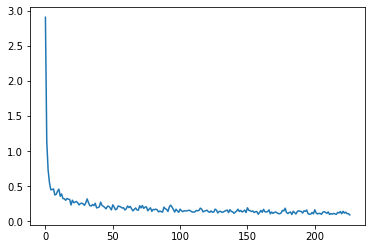

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)